# Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Dataset

In [2]:
df = pd.read_csv('covid_19_clean_complete 23032020.csv', parse_dates=['Date'])

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [4]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
17913,NaN,Uzbekistan,41.377491,64.585262,2020-03-23,46,0,0
17914,NaN,Venezuela,6.423800,-66.589700,2020-03-23,77,0,15
17915,NaN,Vietnam,14.058324,108.277199,2020-03-23,123,0,17
17916,NaN,Zambia,-13.133897,27.849332,2020-03-23,3,0,0
17917,NaN,Zimbabwe,-19.015438,29.154857,2020-03-23,3,1,0


# Preprocessing 

### Cleaning data

In [5]:
# cases
cases=['Confirmed', 'Deaths', 'Recovered', 'Active']

#Active Cases = confirmed - deaths - recovered
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

#Replace Mainland china with just China
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

#filling missing values
df[['Province/State']]= df[['Province/State']].fillna('')
df[cases]=df[cases].fillna(0)                            

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [7]:
df.shape

(17918, 9)

### Derived Tables

Given that there are many cases in cruise ships did not classify which country they are from, we will separate the cases in cruise ships. 


In [8]:
# cases in the ships
ship = df[df['Province/State'].str.contains('Princess')|df['Province/State']
          .str.contains('Cruise Ship')]
#China and the Rest of the world
China = df[df['Country/Region']=='China']
ROW = df[df['Country/Region']!='China']


#Grouped data
df_grouped = df.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 
                                                                      'Recovered', 'Active'].sum().reset_index()

#New Cases
df_grouped['New Case'] = df_grouped.groupby(['Country/Region'])['Confirmed'].diff()
df_grouped['New Case']=df_grouped['New Case'].fillna(0)


#Latest
df_latest = df_grouped[df_grouped['Date']== max(df_grouped['Date'])].reset_index()

#Latest grouped
df_latest_grouped = df_latest.groupby(['Country/Region'])['Confirmed', 
                                                        'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()


In [9]:
df_grouped

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,New Case
0,Afghanistan,2020-01-22,0,0,0,0,0.0
1,Afghanistan,2020-01-23,0,0,0,0,0.0
2,Afghanistan,2020-01-24,0,0,0,0,0.0
3,Afghanistan,2020-01-25,0,0,0,0,0.0
4,Afghanistan,2020-01-26,0,0,0,0,0.0
...,...,...,...,...,...,...,...
8134,Zimbabwe,2020-03-23,3,1,0,2,0.0
8135,occupied Palestinian territory,2020-03-14,0,0,0,0,0.0
8136,occupied Palestinian territory,2020-03-15,0,0,0,0,0.0
8137,occupied Palestinian territory,2020-03-16,0,0,0,0,0.0


In [10]:
df_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active,New Case
0,Afghanistan,40,1,1,38,0.0
1,Albania,104,4,2,98,15.0
2,Algeria,230,17,65,148,29.0
3,Andorra,133,1,1,131,20.0
4,Angola,3,0,0,3,1.0
...,...,...,...,...,...,...
163,Uzbekistan,46,0,0,46,3.0
164,Venezuela,77,0,15,62,7.0
165,Vietnam,123,0,17,106,10.0
166,Zambia,3,0,0,3,0.0


# Data Exploration

## Percentage of Recovered, Death and Active cases

### Worldwide

In [11]:
daily_total = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
current_total = daily_total[daily_total['Date']==max(daily_total['Date'])].reset_index(drop=True)

In [12]:
current_total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-23,378287,16497,100958,260832


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



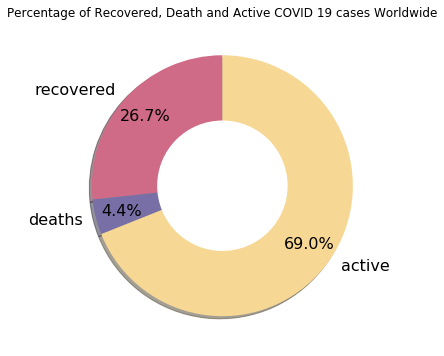

In [13]:
labels = 'recovered', 'deaths', 'active'
sizes=[current_total['Recovered'], current_total['Deaths'], current_total['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':16}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases Worldwide')
plt.show()

The pie above shows that 26.7% of worldwide confirmed cases have recovered and the mortality rate is 4.4%

### China

In [14]:
daily_china=China.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
China_current = daily_china[daily_china['Date']==max(daily_china['Date'])].reset_index(drop=True)

In [15]:
China_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-23,81496,3274,72819,5403


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



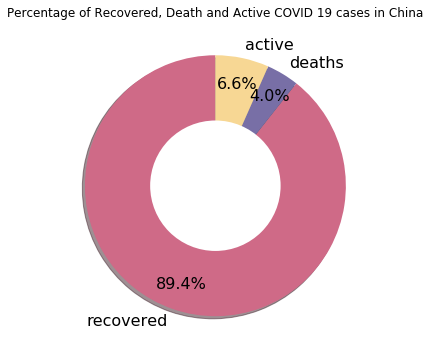

In [16]:
labels = 'recovered', 'deaths', 'active'
sizes=[China_current['Recovered'], China_current['Deaths'], China_current['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':16}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases in China')
plt.show()

There are 89.4% people who confirmed COVID 19 in China have recovered and there are only 6.6% cases still active

### The rest of the world

In [17]:
daily_ROW=ROW.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
ROW_current = daily_ROW[daily_ROW['Date']==max(daily_ROW['Date'])].reset_index(drop=True)

In [18]:
ROW_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-23,296791,13223,28139,255429


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



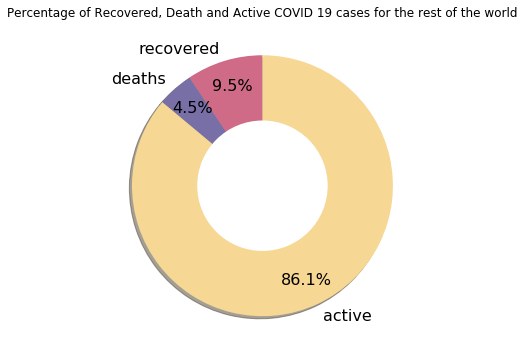

In [19]:
labels = 'recovered', 'deaths', 'active'
sizes=[ROW_current['Recovered'], ROW_current['Deaths'], ROW_current['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':16}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases for the rest of the world')
plt.show()

There are 9.5% COVID cases recovered and 86.1% still active for the rest of the world

### Cruise Ships

In [20]:
daily_ship=ship.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
ship_current = daily_ship[daily_ship['Date']==max(daily_ship['Date'])].reset_index(drop=True)

C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



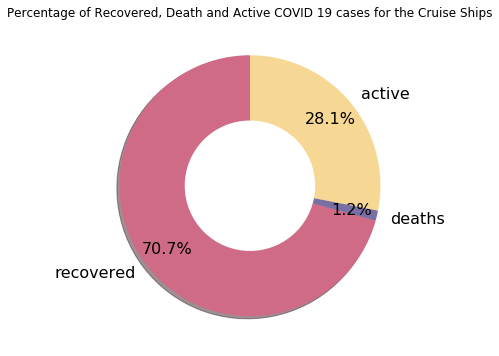

In [21]:
labels = 'recovered', 'deaths', 'active'
sizes=[ship_current['Recovered'], ship_current['Deaths'], ship_current['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':16}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases for the Cruise Ships')
plt.show()

In [22]:
ship_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-23,802,10,567,225


For people got the COVID 19 on the cruise ships, the death rate is 1.2% and there are 28.1% cases still active. 

## Countrywise Data

### Confirmed, Death, Recovered, Active and New cases in each country

In [23]:
confirmed_df = df_latest_grouped.sort_values(by='Confirmed', ascending=False)
confirmed_df = confirmed_df.reset_index(drop=True)
confirmed_df.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active,New Case
0,China,81496,3274,72819,5403,99
1,Italy,63927,6077,7432,50418,4789
2,US,43667,552,0,43115,10391
3,Spain,35136,2311,3355,29470,6368
4,Germany,29056,123,453,28480,4183
5,Iran,23049,1812,8376,12861,1411
6,France,20123,862,2207,17054,4079
7,"Korea, South",8961,111,3166,5684,64
8,Switzerland,8795,120,131,8544,1550
9,United Kingdom,6726,336,140,6250,985


### Death reported in coutries

In [24]:
# Calculate death rate
confirmed_df['Death Rate'] = round(confirmed_df['Deaths']/confirmed_df['Confirmed']*100, 2)
# Death report arranged based on death number
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Deaths', 'Death Rate']].head(20)
death_df = death_df.sort_values('Deaths', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

,Country/Region,Deaths,Death Rate
0,Italy,6077,9.51
1,China,3274,4.02
2,Spain,2311,6.58
3,Iran,1812,7.86
4,France,862,4.28
5,US,552,1.26
6,United Kingdom,336,5
7,Netherlands,214,4.49
8,Germany,123,0.42
9,Switzerland,120,1.36


In [25]:
# Death report arranged based on death rate
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Death Rate', 'Deaths']].head(20)
death_df = death_df.sort_values('Death Rate', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

,Country/Region,Death Rate,Deaths
0,Italy,9.51,6077
1,Iran,7.86,1812
2,Spain,6.58,2311
3,United Kingdom,5,336
4,Netherlands,4.49,214
5,France,4.28,862
6,China,4.02,3274
7,Belgium,2.35,88
8,Brazil,1.77,34
9,Denmark,1.53,24


### Recovery reported in countries

In [26]:
# Calculate recovery rate
confirmed_df['Recovery Rate'] = round(confirmed_df['Recovered']/confirmed_df['Confirmed']*100, 2)
# Recovery report arranged based on recovered cases
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovered', 'Recovery Rate']].head(20)
recovery_df = recovery_df.sort_values('Recovered', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

,Country/Region,Recovered,Recovery Rate
0,China,72819,89.35
1,Iran,8376,36.34
2,Italy,7432,11.63
3,Spain,3355,9.55
4,"Korea, South",3166,35.33
5,France,2207,10.97
6,Germany,453,1.56
7,Belgium,401,10.71
8,Malaysia,159,10.47
9,United Kingdom,140,2.08


In [27]:
# Recovery report arranged based on recovery rate
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovery Rate', 'Recovered']].head(20)
recovery_df = recovery_df.sort_values('Recovery Rate', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

,Country/Region,Recovery Rate,Recovered
0,China,89.35,72819
1,Iran,36.34,8376
2,"Korea, South",35.33,3166
3,Italy,11.63,7432
4,France,10.97,2207
5,Belgium,10.71,401
6,Malaysia,10.47,159
7,Spain,9.55,3355
8,Australia,7.07,119
9,Israel,2.84,41


### New case increase in countries

In [28]:
# Recovery report arranged based on recovery rate
new_case_df = confirmed_df[['Country/Region', 'New Case']].head(30)
new_case_df = new_case_df.sort_values('New Case', ascending=False).reset_index(drop=True)
new_case_df.style.background_gradient(cmap='Greens')

,Country/Region,New Case
0,US,10391
1,Spain,6368
2,Italy,4789
3,Germany,4183
4,France,4079
5,Switzerland,1550
6,Iran,1411
7,Austria,1230
8,United Kingdom,985
9,Canada,623


## Data Visualization 

## Comparison among top 20 countries

### Accumulated Confirmed Cases

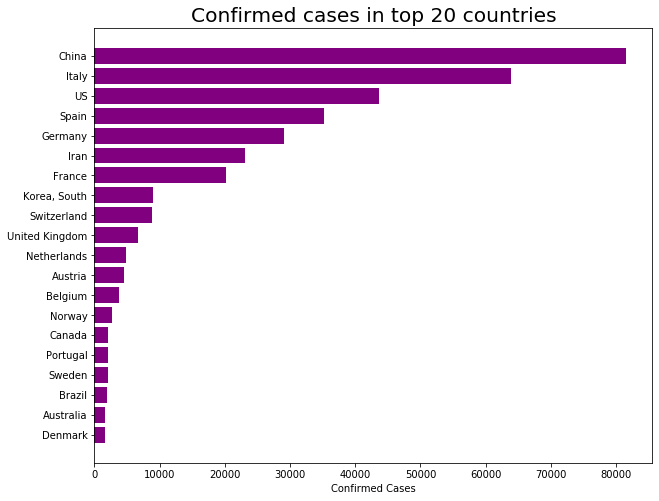

In [29]:
top_20_confirmed = confirmed_df.head(20).sort_values('Confirmed', ascending=True)
countries = top_20_confirmed['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_confirmed['Confirmed'].values

plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', color='purple', tick_label=performance)
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Confirmed Cases')
plt.title('Confirmed cases in top 20 countries')
plt.show()

### Deaths

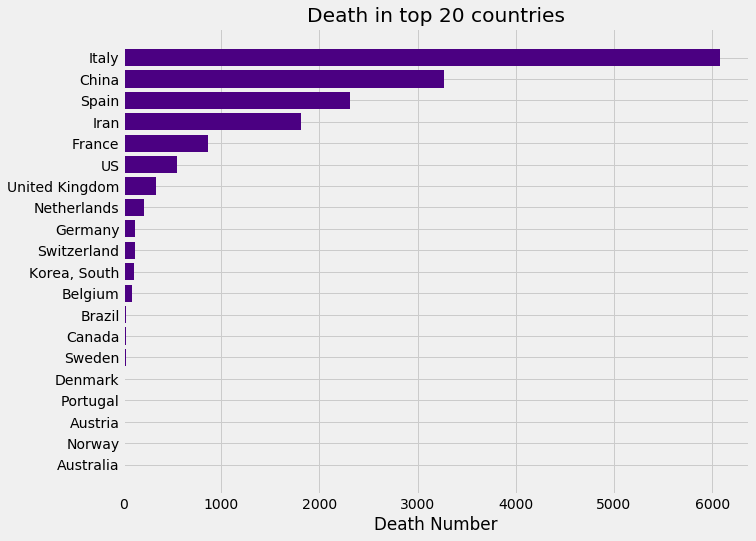

In [30]:
top_20_death= confirmed_df.head(20).sort_values('Deaths', ascending=True)
countries = top_20_death['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death['Deaths'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='indigo')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Number')
plt.title('Death in top 20 countries')
plt.show()

### Death Rate

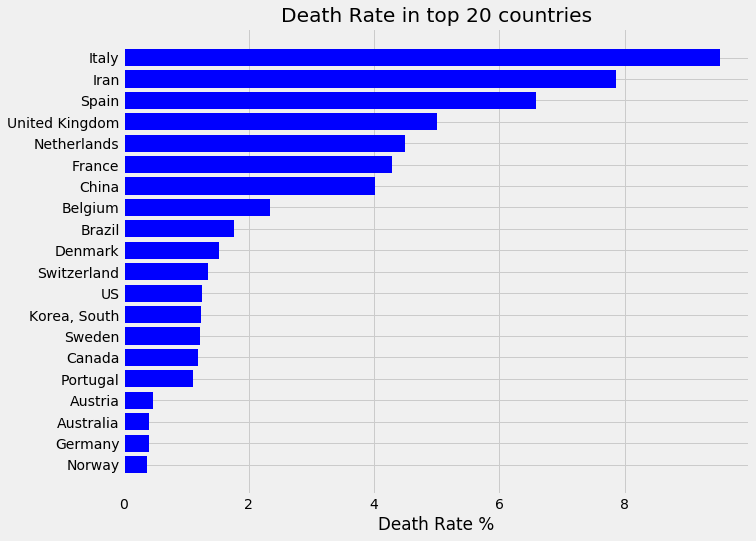

In [31]:
top_20_death_rate= confirmed_df.head(20).sort_values('Death Rate', ascending=True)
countries = top_20_death_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death_rate['Death Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='blue')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Rate %')
plt.title('Death Rate in top 20 countries')
plt.show()

### Recovered Number

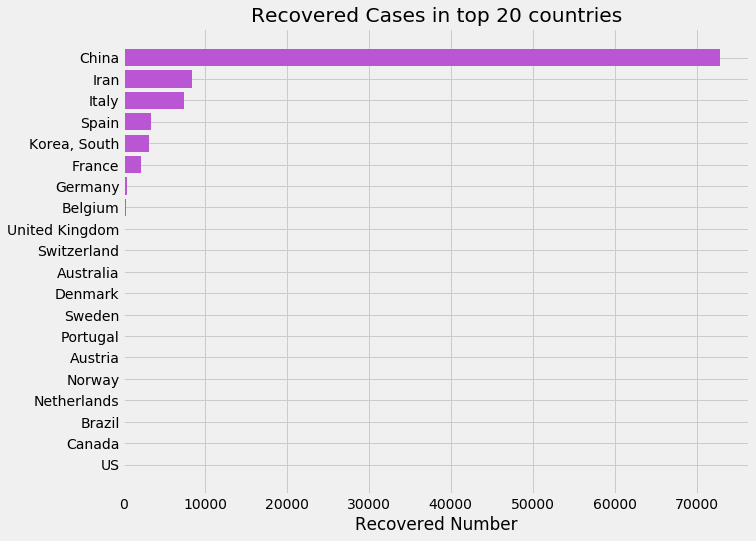

In [32]:
top_20_recovered= confirmed_df.head(20).sort_values('Recovered', ascending=True)
countries = top_20_recovered['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovered['Recovered'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumorchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovered Number')
plt.title('Recovered Cases in top 20 countries')
plt.show()

### Recovery Rate

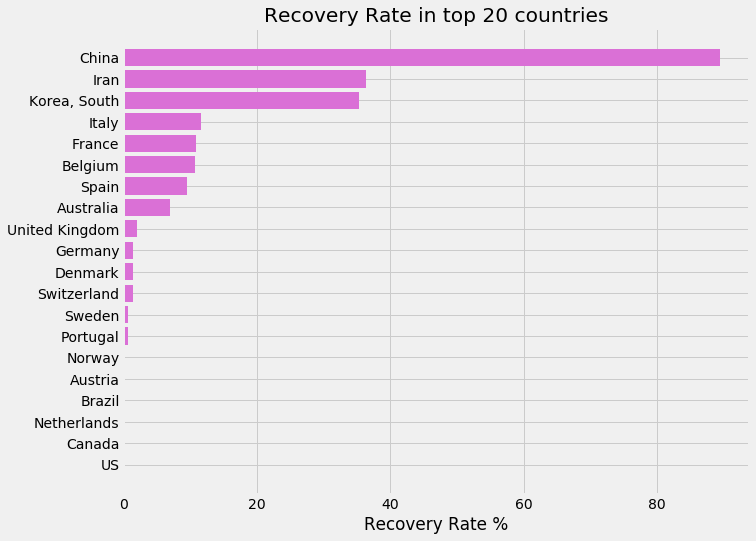

In [33]:
top_20_recovery_rate= confirmed_df.head(20).sort_values('Recovery Rate', ascending=True)
countries = top_20_recovery_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovery_rate['Recovery Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='orchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovery Rate %')
plt.title('Recovery Rate in top 20 countries')
plt.show()

### Active Cases

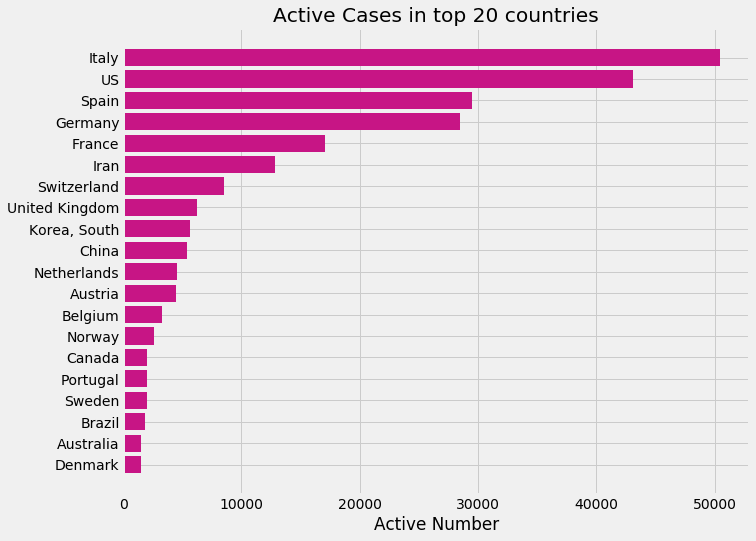

In [34]:
top_20_active= confirmed_df.head(20).sort_values('Active', ascending=True)
countries = top_20_active['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_active['Active'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumvioletred')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Active Number')
plt.title('Active Cases in top 20 countries')
plt.show()

### New Cases

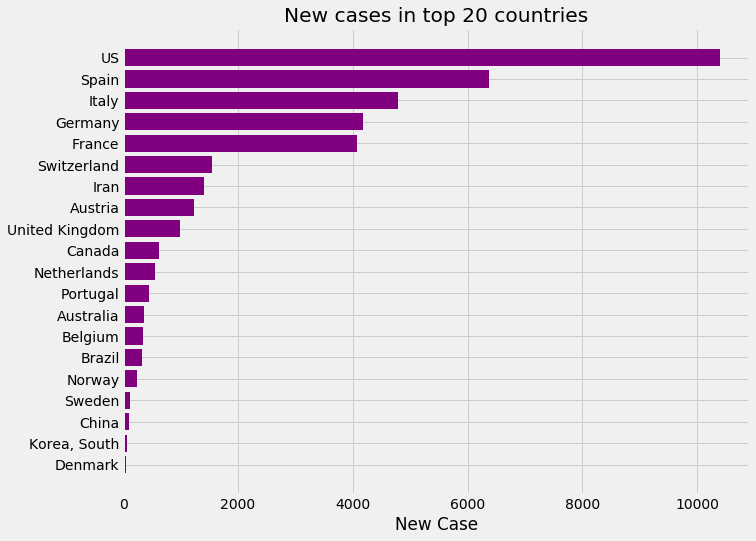

In [35]:
top_20_confirmed = confirmed_df.head(20).sort_values('New Case', ascending=True)
countries = top_20_confirmed['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_confirmed['New Case'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='purple')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('New Case')
plt.title('New cases in top 20 countries')
plt.show()

### Comparison between China and the rest of the world

In [36]:
compare_df = pd.concat([China_current, ROW_current], axis=0)
compare_df.index = ['China', 'ROW']
compare_df

,Date,Confirmed,Deaths,Recovered,Active
China,2020-03-23,81496,3274,72819,5403
ROW,2020-03-23,296791,13223,28139,255429


# Case change over time

### China

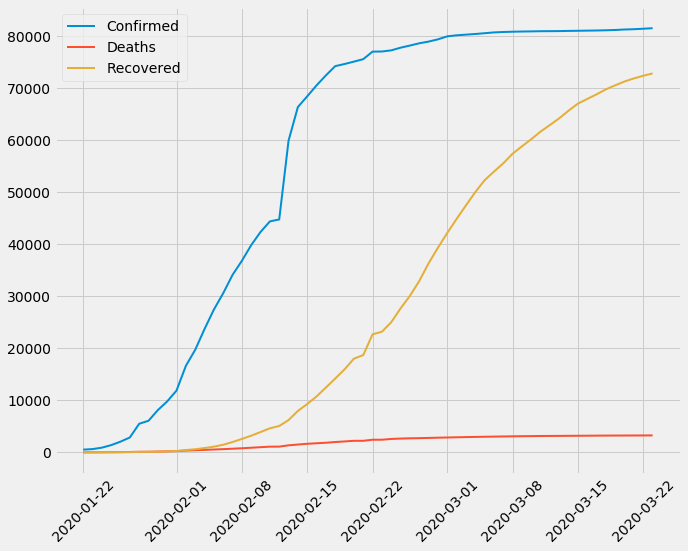

In [37]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_china['Date'], daily_china['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_china['Date'], daily_china['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### Rest of the World

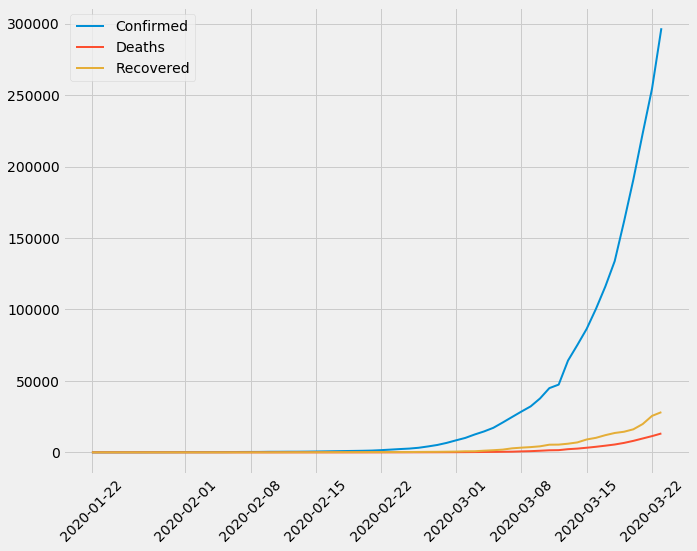

In [38]:
plt.figure(figsize=(10,8))
plt.plot(daily_ROW['Date'], daily_ROW['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_ROW['Date'], daily_ROW['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### Italy

In [39]:
for country in top_20_confirmed['Country/Region']:
    def change_over_time(country):
        x = df_grouped[df_grouped['Country/Region']==country]['Date']
        y1 = df_grouped[df_grouped['Country/Region']==country]['Confirmed']
        y2 = df_grouped[df_grouped['Country/Region']==country]['Deaths']
        y3 = df_grouped[df_grouped['Country/Region']==country]['Recovered']
        plt.figure(figsize=(10,8))
        plt.plot(x, y1, label='Confirmed', linewidth=2, marker='o', markevery=7)
        plt.plot(x, y2, label='Deaths', linewidth=2, marker='o', markevery=7)
        plt.plot(x, y3, label='Recovered', linewidth=2, marker='o', markevery=7)
        plt.xticks(rotation='45')
        plt.legend()

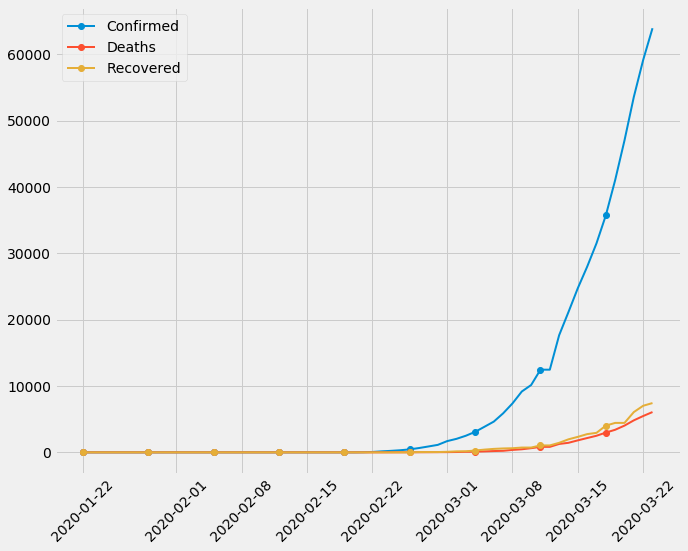

In [40]:
change_over_time('Italy')

### US

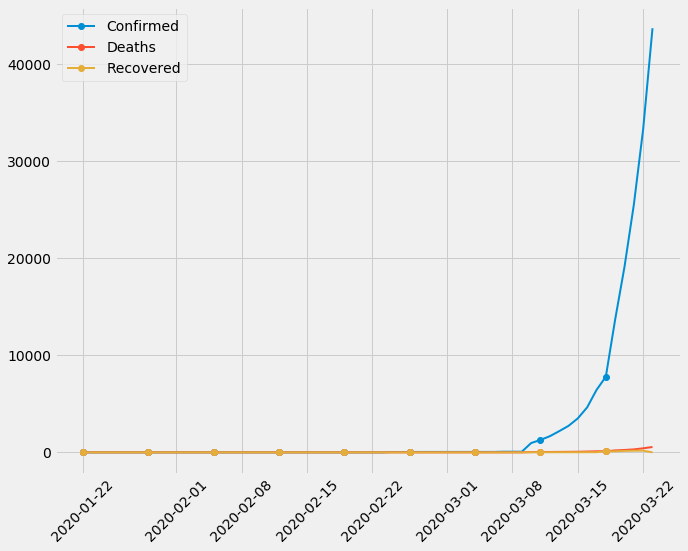

In [41]:
change_over_time('US')

### Iran

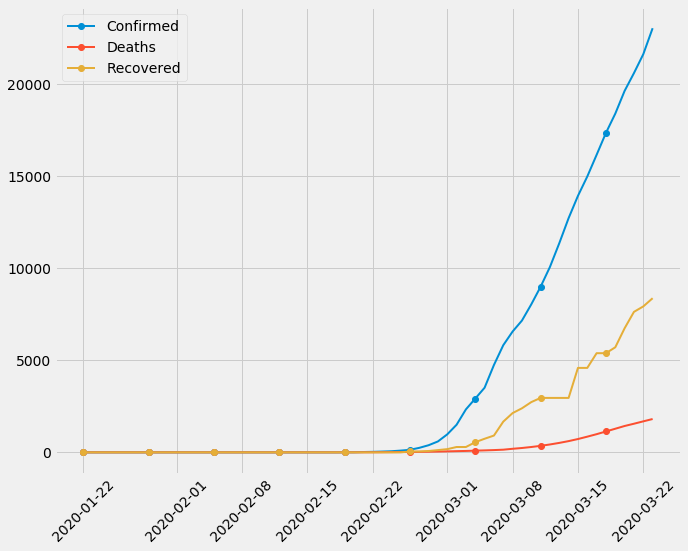

In [42]:
change_over_time('Iran')

### Japan

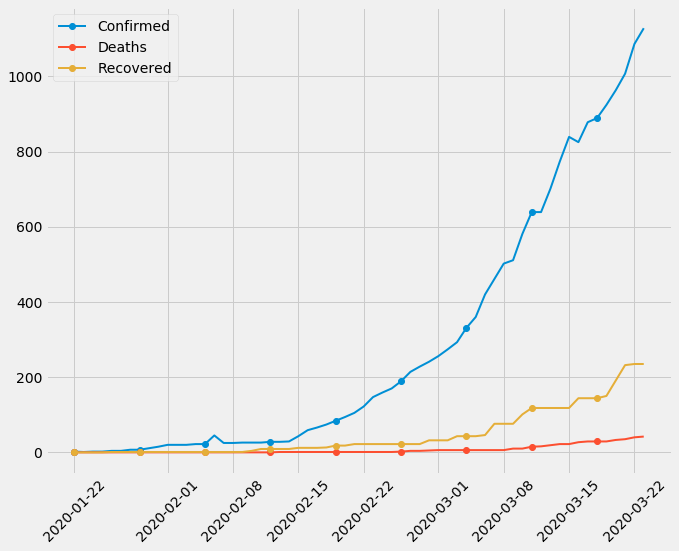

In [43]:
change_over_time('Japan')

### South Korea

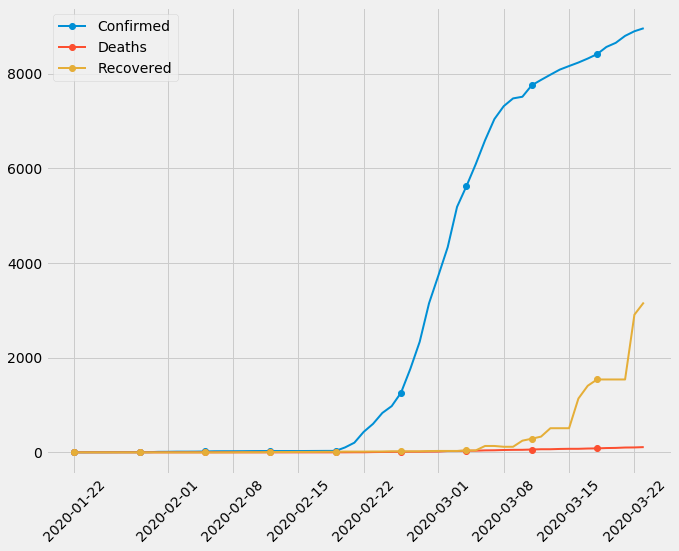

In [44]:
change_over_time('Korea, South')

### Australia

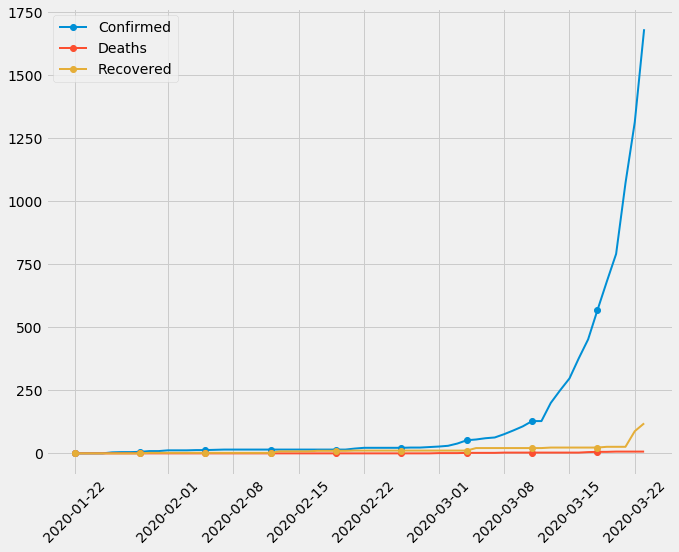

In [45]:
change_over_time('Australia')

## Comparison between China and the Rest of the World

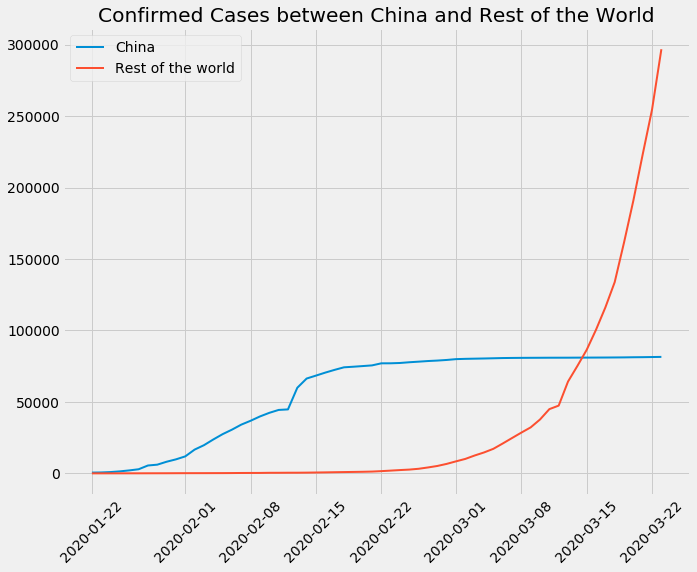

In [46]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Confirmed'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Confirmed'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Confirmed Cases between China and Rest of the World')
plt.legend()

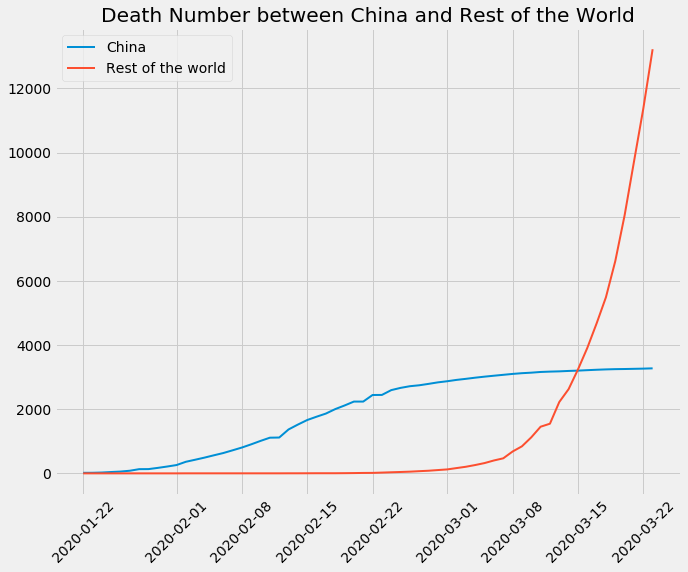

In [47]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Deaths'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Deaths'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Death Number between China and Rest of the World')
plt.legend()

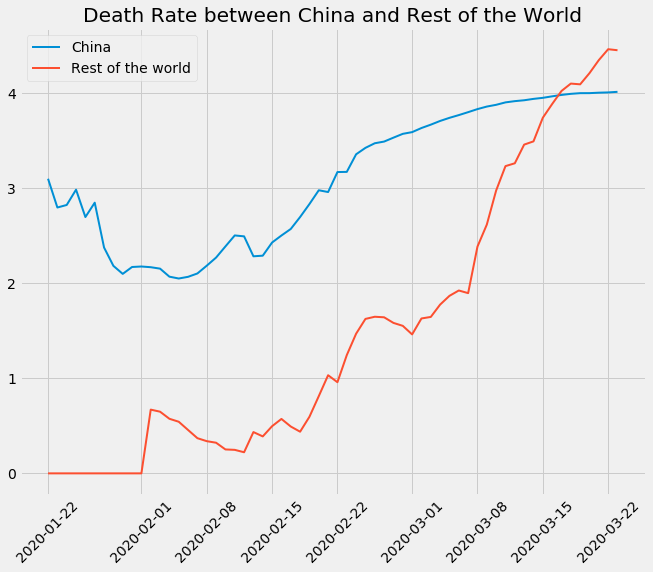

In [48]:
daily_china['Death rate']=daily_china['Deaths']/daily_china['Confirmed']*100
daily_ROW['Death rate']=daily_ROW['Deaths']/daily_ROW['Confirmed']*100
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Death rate'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Death rate'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Death Rate between China and Rest of the World')
plt.legend()

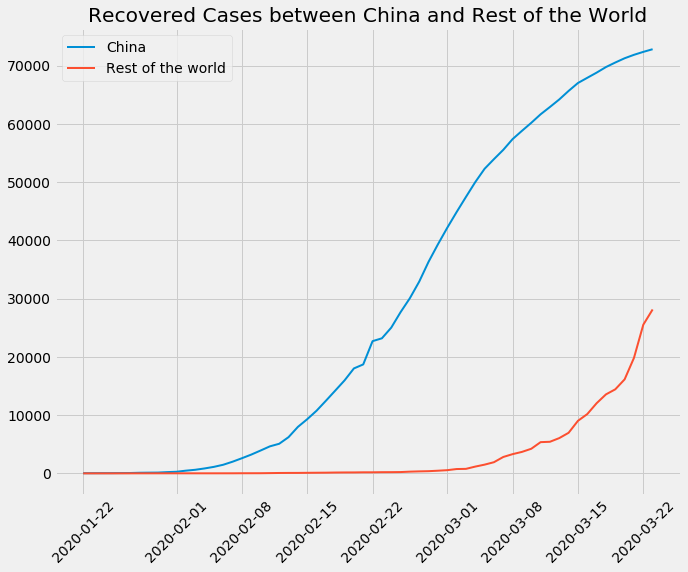

In [49]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Recovered'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Recovered'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Recovered Cases between China and Rest of the World')
plt.legend()

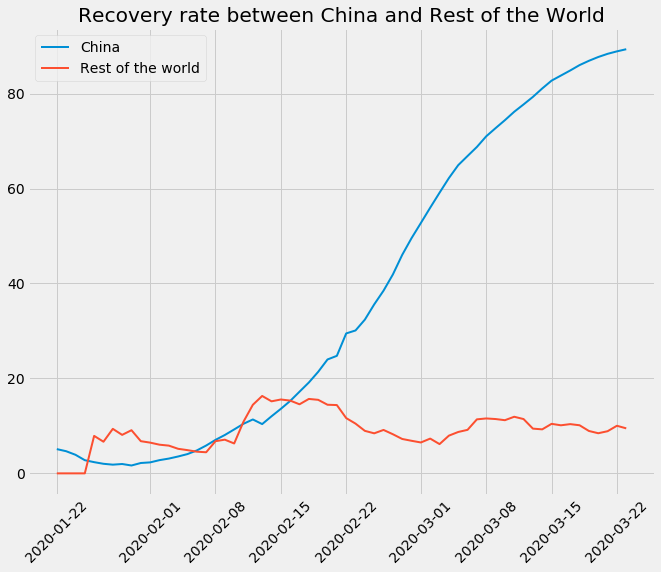

In [50]:
daily_china['Recovery rate']=daily_china['Recovered']/daily_china['Confirmed']*100
daily_ROW['Recovery rate']=daily_ROW['Recovered']/daily_ROW['Confirmed']*100
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Recovery rate'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Recovery rate'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Recovery rate between China and Rest of the World')
plt.legend()

### Comparison amoung a few countries

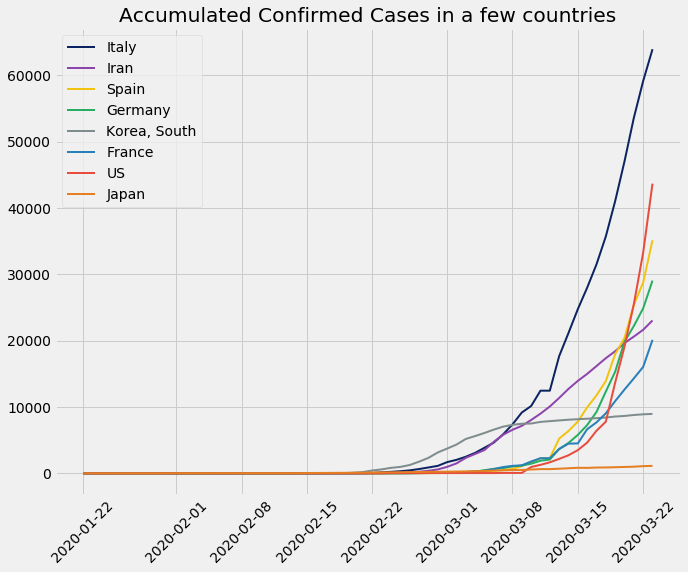

In [51]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Italy']['Confirmed']
y2=df_grouped[df_grouped['Country/Region']=='Iran']['Confirmed']
y3=df_grouped[df_grouped['Country/Region']=='Spain']['Confirmed']
y4=df_grouped[df_grouped['Country/Region']=='Germany']['Confirmed']
y5=df_grouped[df_grouped['Country/Region']=='Korea, South']['Confirmed']
y6=df_grouped[df_grouped['Country/Region']=='France']['Confirmed']
y7=df_grouped[df_grouped['Country/Region']=='US']['Confirmed']
y8=df_grouped[df_grouped['Country/Region']=='Japan']['Confirmed']
plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Italy', linewidth=2, c='#0c2461')
plt.plot(x, y2,  label='Iran', linewidth=2, c='#8e44ad')
plt.plot(x, y3,  label='Spain', linewidth=2, c='#f1c40f')
plt.plot(x, y4,  label='Germany', linewidth=2, c='#27ae60')
plt.plot(x, y5,  label='Korea, South', linewidth=2, c='#7f8c8d')
plt.plot(x, y6,  label='France', linewidth=2, c='#2980b9')
plt.plot(x, y7,  label='US', linewidth=2, c='#e74c3c')
plt.plot(x, y8,  label='Japan', linewidth=2, c='#e67e22')
plt.xticks(rotation='45')
plt.title('Accumulated Confirmed Cases in a few countries')
plt.legend()

### New cases increased in European countries

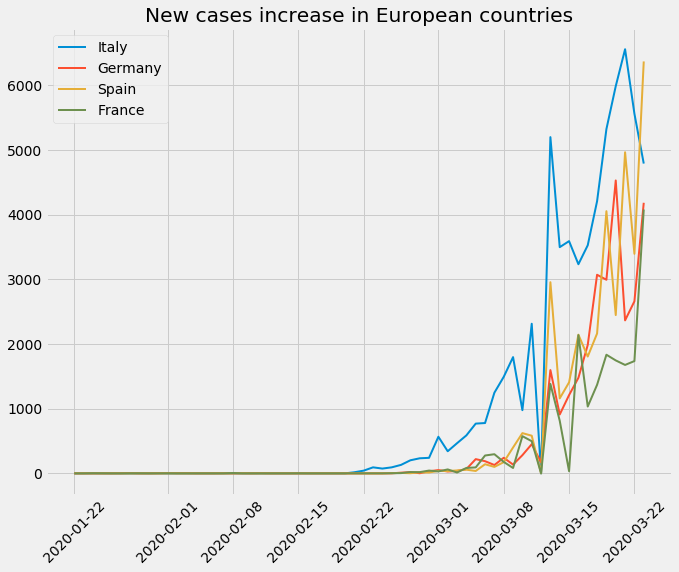

In [52]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Italy']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Germany']['New Case']
y3=df_grouped[df_grouped['Country/Region']=='Spain']['New Case']
y4=df_grouped[df_grouped['Country/Region']=='France']['New Case']

plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Italy', linewidth=2, )
plt.plot(x, y2,  label='Germany', linewidth=2, )
plt.plot(x, y3,  label='Spain', linewidth=2, )
plt.plot(x, y4,  label='France', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in European countries')
plt.legend()

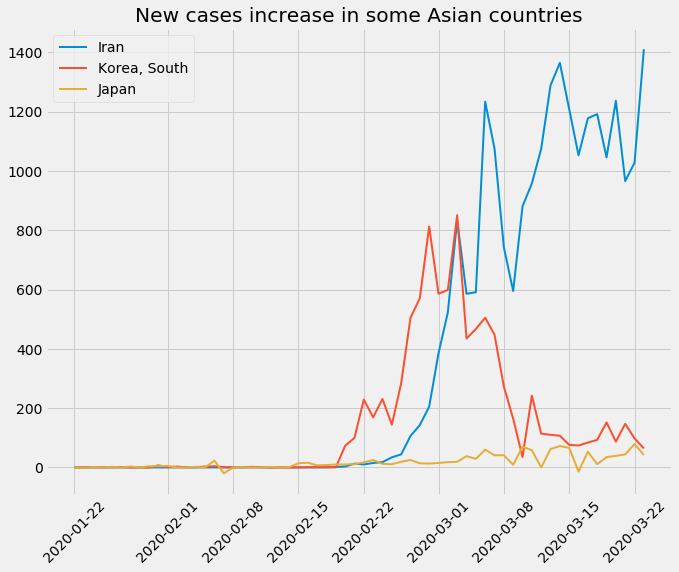

In [53]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Iran']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Korea, South']['New Case']
y3=df_grouped[df_grouped['Country/Region']=='Japan']['New Case']

plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Iran', linewidth=2, )
plt.plot(x, y2,  label='Korea, South', linewidth=2, )
plt.plot(x, y3,  label='Japan', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in some Asian countries')
plt.legend()

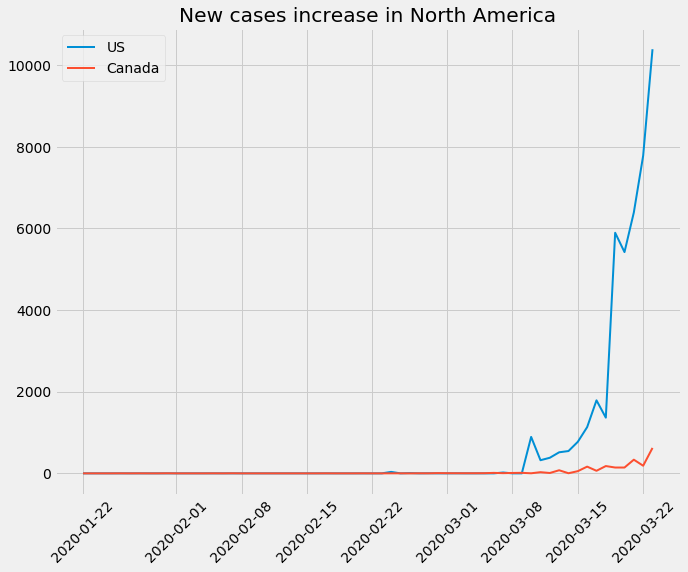

In [54]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='US']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Canada']['New Case']


plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='US', linewidth=2, )
plt.plot(x, y2,  label='Canada', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in North America')
plt.legend()